# Introductory applied machine learning
# Assignment 2: Linear regression

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation: **in questions where this is specified, you will be penalised if you go over.**

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (which typically refers only to the independent variables, i.e. excluding the target variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from others. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "02_LinearRegression.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="02_LinearRegression.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "02_LinearRegression.ipynb"
```

**N.B.: This is still Coursework 1 (cw1)**

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignment.

In [26]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:
from utils.plotter import plot_hinton

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.set_option('display.width',None)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error
from math import sqrt, log
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler

## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: 

1. The specification of an automobile in terms of various characteristics 

1. Assigned insurance risk rating 
   * this rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

1. Normalized losses in use as compared to other cars
  * the third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year (avg_loss/car/year). 


To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.


## 1. Data Visualisation

Before jumping into our problem, it is beneficial to get a feel for the data we are dealing with in the rest of the assignment.

<a id='question_1_1'></a>
### ========== Question 1.1 --- [8 marks] ==========

Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Using any suitable pandas functionality, 
1. [Code] summarise *and*
1. [Text] comment upon

the key features of the data. Show all your code!

In [2]:
# (1) # Your Code goes here:
data_path = os.path.join(os.getcwd(),'datasets','train_auto_numeric.csv')
auto_numeric = pd.read_csv(data_path,delimiter=',')
print('attributes', auto_numeric.columns.values)
print(auto_numeric.head())
print('Number of samples: {}, number of attributes: {}'.format(auto_numeric.shape[0], auto_numeric.shape[1]))
auto_numeric.describe()

attributes ['normalized-losses' 'wheel-base' 'length' 'width' 'height' 'engine-size'
 'bore' 'stroke' 'compression-ratio' 'engine-power' 'peak-rpm' 'city-mpg'
 'highway-mpg' 'mean-effective-pressure' 'torque' 'price']
   normalized-losses  wheel-base  length  width  height  engine-size  bore  \
0              164.0        99.8   176.6   66.2    54.3         8.85  3.19   
1              110.0        99.4   162.4   66.4    54.3        15.18  3.19   
2              158.0       105.8   192.7   71.4    51.6        15.18  3.94   
3              106.0        86.6   158.7   67.7    55.9        13.74  3.13   
4              192.0       101.2   176.8   64.8    54.3         8.67  3.50   

   stroke  compression-ratio  engine-power  peak-rpm  city-mpg  highway-mpg  \
0     3.4               10.0      102000.0    5500.0      24.0         30.0   
1     3.4                8.0      115000.0    5500.0      18.0         22.0   
2     2.8                8.5       70000.0    4400.0      28.0         30.0 

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


(2) ***Your answer goes here:***

attributes ['normalized-losses' 'wheel-base' 'length' 'width' 'height' 'engine-size'
 'bore' 'stroke' 'compression-ratio' 'engine-power' 'peak-rpm' 'city-mpg'
 'highway-mpg' 'mean-effective-pressure' 'torque' 'price']

print('attributes', auto_numeric.columns.values)
print(auto_numeric.head())
print(auto_numeric.describe())
print('Number of samples: {}, number of attributes: {}'.format(auto_numeric.shape[0], auto_numeric.shape[1]))

### ========== Question 1.2 --- [18 marks] ==========

We will now examine the attributes in some detail. Familiarise yourself with the concept of Correlation Coefficients (start from the Lecture on Generalisation and Evaluation).

1. [Code] Analyse first the relationship between each attribute and price:
  1. Compute the correlation coefficient between each attribute and price, *and*
  1. Visualise the (pairwise) distribution of each attribute with price
1. [Text] Given the above, which attributes do you feel may be most useful in predicting the price? (mention at least 5). How did you reach this conclusion? *Hint: which is the more useful of the above tools?*
1. [Code] Now we will analyse the relationship between the attributes themselves. Use an appropriate pairwise visualisation tool to display graphically the relationship between each pair of attributes you selected in (2).
1. [Text] Do any attributes exhibit significant correlations between one-another? (restrict your analysis to useful attributes identified above)
1. [Text] Which attributes (give examples) would you consider removing if we wish to reduce the dimensionality of the problem and why?

the correlation between normalized-losses and price is 0.015367647423658213
the correlation between wheel-base and price is 0.42351059515038575
the correlation between length and price is 0.5128830452653906
the correlation between width and price is 0.5243255521274495
the correlation between height and price is 0.13956255898680378
the correlation between engine-size and price is 0.7151245901914791
the correlation between bore and price is 0.3652072892128543
the correlation between stroke and price is 0.12783403193265097
the correlation between compression-ratio and price is 0.12568322167466553
the correlation between engine-power and price is 0.44396859146316336
the correlation between peak-rpm and price is -0.09934529106318549
the correlation between city-mpg and price is -0.3567895006724703
the correlation between highway-mpg and price is -0.4384674317144328
the correlation between mean-effective-pressure and price is -0.10486005065048885
the correlation between torque and price is 0

<Figure size 3456x345.6 with 0 Axes>

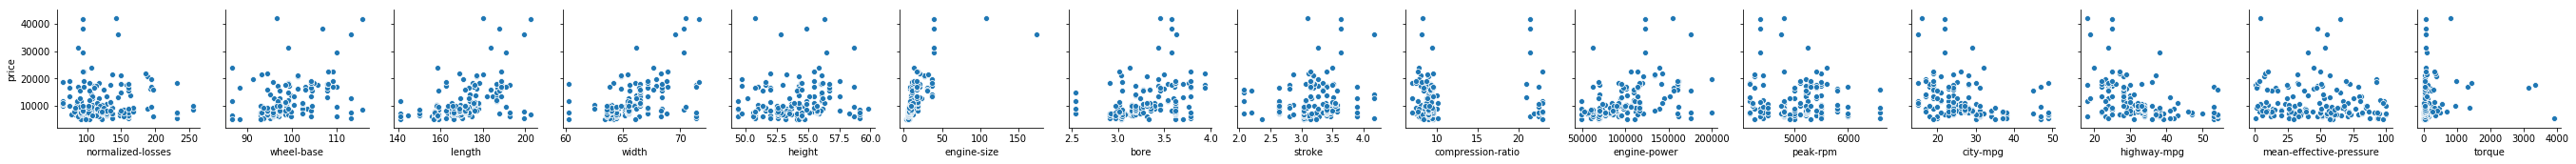

In [3]:
# (1) # Your Code goes here:
for column in auto_numeric.columns:
    if column == 'price':
        break
    correlation = auto_numeric.loc[:,column].corr(auto_numeric.loc[:,'price'])

    print('the correlation between {} and price is {}'.format(column,correlation))

plt.figure(figsize=(15 * 3.2, 4.8))

x_vars_dataFrame = auto_numeric.drop('price',axis=1)


sns.pairplot(auto_numeric, x_vars=x_vars_dataFrame.columns.values, y_vars='price')

plt.show()

(2) ***Your answer goes here:***

according to the Correlation Coefficients data, "engine-size", "width", "length", "engine-power" , "highway-mpg" may be most useful in predicting the price. Because the value of Correlation Coefficients is more closer to 1 the more relevant with price.

<Figure size 3456x345.6 with 0 Axes>

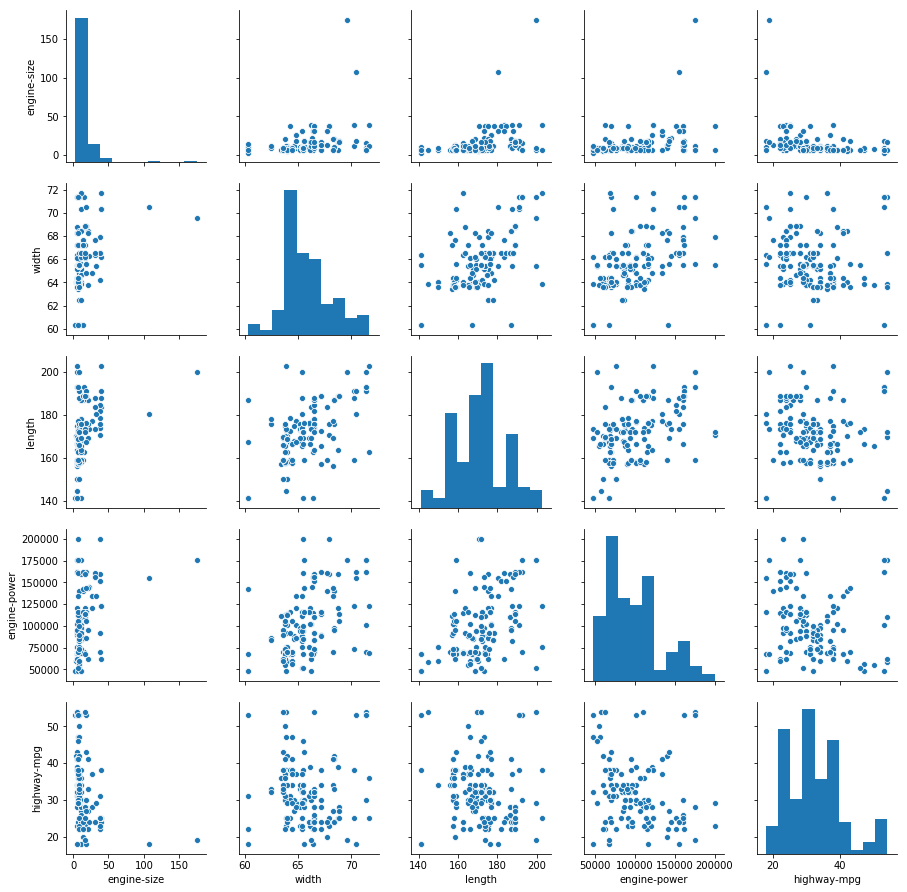

In [4]:
# (3) # Your Code goes here:
plt.figure(figsize=(15 * 3.2, 4.8))


selectColumns = ['engine-size','width','length','engine-power','highway-mpg']

sns.pairplot(auto_numeric, x_vars=selectColumns, y_vars=selectColumns)


plt.show()

(4) ***Your answer goes here:***
according to the pairplot, I think:
1, width and length have a correlation. 
2, There is a weak correlation between width and engine-power
3, There is a weak correlation between length and engine-power

(5) ***Your answer goes here:***
according to the Correlation Coefficients data, I will "mean-effective-pressure" and "torque", because the correlation between each of them and price is weak, just about 0.1 and the graph also show there is weak relation between each them and price.

## 2. Simple Linear Regression

When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. We will thus begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable, which we take to be the `engine-power`.

### ========== Question 2.1 --- [5 marks] ==========

1. [Code] Produce a scatter plot of `price` against `engine-power` (label the axis). 
1. [Text] What are your thoughts about the ability of the variable to predict the price?

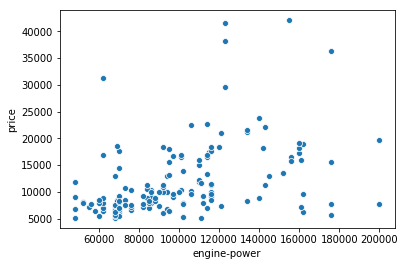

In [5]:
# (1) # Your Code goes here:

plt.figure()
plt.subplot(1,1,1)
sns.scatterplot(x='engine-power',y='price',data=auto_numeric)
plt.xlabel('engine-power')
plt.ylabel('price')
plt.show()


(2) ***Your answer goes here:***

Although there are some outliers, I believe that "engine-power" have medium ability to predict the price.

### ========== Question 2.2 --- [8 marks] ==========

1. [Code] Now visualise the distribution of the car price (again label the axes). Choose a sensible value for the number of bins in the histogram.
1. [Text] Comment on why the price variable *may not* be easy to model using linear regression, and suggest possible preprocessing to improve its applicability. At the same time, explain why it is not conclusive that it is the case at this stage. 
*N.B. There is no need to carry out the preprocessing at this stage, just comments*

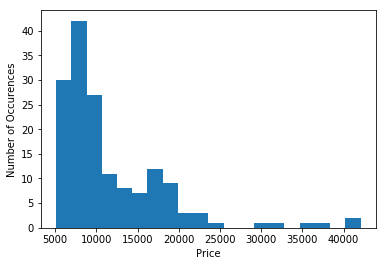

In [6]:
# (1) # Your Code goes here:
plt.hist(auto_numeric.iloc[:,-1], bins=20)
plt.xlabel("Price")
plt.ylabel("Number of Occurences")
plt.show()

(2) ***Your answer goes here:***

Because the price data is skewed, it is biased towards the range of 5000-20000.

Need to convert the price data so that the data is evenly distributed in each interval，the method can use math method "log"

### ========== Question 2.3 --- [3 marks] ==========
We want to prepare our dataset for training/testing. Extract the dependent variable into a vector and the independent attribute into another. Split the dataset with 80% for training and the remaining 20% for testing, naming the resulting arrays `X_train`, `X_test`, `y_train` and `y_test`.

*Hint: you may use Scikit's `train_test_split`: set the random state to 0 for reproducibility*.

**N.B. For technical reasons, `X_train`/`X_test` must be 2D arrays: extend the dimensions of the independent attribute before splitting the dataset, such that the shape of the resulting array is (n,1) where n is the number of instances in the dataset**.

In [7]:
# Your Code goes here:
X = auto_numeric['engine-power']
y = auto_numeric['price']

X = np.reshape(X.values, (X.shape[0],1))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

### ========== Question 2.4 --- [4 marks] ==========

Decide on a simple **baseline** to predict the `price` variable. Implement it and display its parameter.

*Hint: This should be just 1 line of code + a print/display*

In [8]:
# Your Code goes here:
print('the baseline is y =',y_train.mean())

the baseline is y = 11853.267716535433


<a id='question_2_5'></a>
### ========== Question 2.5 --- [7 marks] ==========
Now we want to build a simple linear regression model. We will use Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html) class. 
1. [Code] Train a `LinearRegression` model and report its parameters: ***N.B.*** *Here we mean the weights of the Regression  Function*.
1. [Text] Interpret the result, and comment on what impact this has *if any* on the relevance of the `engine-power` attribute to predict the `price`.

In [41]:
# (1) # Your Code goes here:
lm = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
a = lm.fit(X_train,y_train)
print(lm.coef_)

[0.08988389]


(2) ***Your answer goes here:***

The weights is small, because according to question 1.1, we know that the average value of engine-power exceeds 90,000, while the average price is only 10,000, so according to the formula y = wx + b, w will be smaller.

The purpose of our training is to find the most suitable weights to predict the price, weights affects the accuracy of the prediction.

### ========== Question 2.6 --- [9 marks] ==========
Now we will evaluate and compare the performance of our models on the **testing** data.
1. [Code] Produce a scatter plot of the *test-data* price data-points (i.e. plot the independent variable along the X-axis and the price along the Y-axis). Add the regression line to the plot and show the predictions on the testing set by using a different marker. Finally plot also the baseline predictor (same figure). Label your axes and provide a [legend](https://matplotlib.org/2.2.3/api/legend_api.html).
1. [Text] Just by looking at this plot, how do the two models compare?

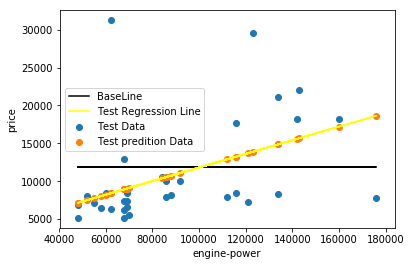

In [10]:
# (1) # Your Code goes here:
plt.figure()
plt.subplot(1,1,1)
plt.scatter(X_test, y_test, label="Test Data")
testY_pred = lm.predict(X=X_test)
#build the baseLine
baseLineList = []
for i in range(len(X_test)):
    baseLineList.append(y_train.mean())
baseLine = np.reshape(baseLineList, (X_test.shape[0],1))
plt.scatter(X_test,testY_pred, label="Test predition Data")
plt.plot(X_test,baseLine,label="BaseLine",color='black')
plt.plot(X_test,testY_pred,label="Test Regression Line",color='yellow')
plt.xlabel("engine-power")
plt.ylabel("price")
plt.legend()
plt.show()

(2) ***Your answer goes here:***

yT means all true value, yP means all LinearRegression predicted value, yB means all the baseline value

so we can use E = pow((yP - yT),2) / pow((yB - yT),2)

to calculate the ratio of errors generated by the two models

if the E > 1 means linear predictions worse than baseline, else if E < 1 means linear predictions better than baseline


### ========== Question 2.7 --- [20 marks] ==========
 
You might have noticed that the above plot is not easy to interpret. 
1. [Code] Generate another plot, this time showing a histogram of the residuals under both models (label everything). 
1. [Code] Report also the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE) on the same **hold-out** testing set for both predictors. *Hint: Scikit Learn has functions to help in evaluating both measures.*
1. [Text] Comment on the result. *Hint: In your answer, you should discuss what the graph is showing and what the two values are measuring, and finally compare the two models under all measures/plots.*

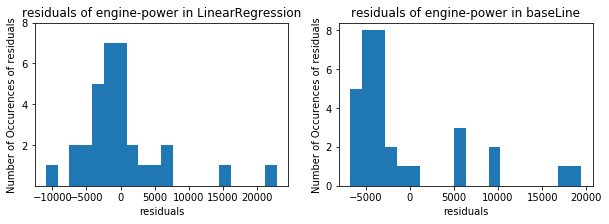

In [11]:
# (1) # Your Code goes here:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.hist(y_test - testY_pred,bins=20)
plt.xlabel('residuals')
plt.ylabel('Number of Occurences of residuals')
plt.title('residuals of engine-power in LinearRegression')
plt.yticks([2,4,6,8])

plt.subplot(1,2,2)
plt.hist(y_test - baseLineList,bins=20)
plt.xlabel('residuals')
plt.ylabel('Number of Occurences of residuals')
plt.title('residuals of engine-power in baseLine')

plt.show()


In [12]:
# (2) # Your Code goes here:
r2Score = r2_score(y_test,testY_pred)
print('r2 score of LinearRegression is ',r2Score)

mse = mean_squared_error(y_test,testY_pred)
print('RMSE value LinearRegression is',sqrt(mse))

print('####################################')

r2Score_base = r2_score(baseLineList,testY_pred)
print('r2 score of baseLine is ',r2Score_base)

mse_base = mean_squared_error(baseLineList,testY_pred)
print('RMSE value baseLine is',sqrt(mse_base))


r2 score of LinearRegression is  0.16852372539951466
RMSE value LinearRegression is 6153.70386613629
####################################
r2 score of baseLine is  0.0
RMSE value baseLine is 3253.6439616946836


(3) ***Your answer goes here:***

1，for the graph，the number occurences of the first picture near 0 is more than that of the second picture.
   This means that the prediction of the first picture(LinearRegression) is better than the second one(baseLine).

2, a)R2 means how well the Linear regression model fitted the data. and It also known as coefficient of determination, and indicates that strength of the correlation between variables and y. As I calculate, the R2 value(about 0.168) is very lower, it means the "engine-power" variable only affects "price" weakly, so "engine-power" is not a very good predictor. R2 == 0 means it is a baseLine.

   b)RMSE means the average of the error between the predicted and actual values. the value is about 6153, it means the different between the predicted and actual "price" exceeds 6000 pounds. This means this model is not very good for fitting the data.

3, from the graph and r2, it can show that Although the LinearRegression model is better than the baseLine model in R2, the value of LinearRegression model is worse than the baseLine model
   
  

<a id='question_2_8'></a>
### ========== Question 2.8 --- [9 marks] ==========

So far we have used a hold-out test set for validation.

1. [Text] What are the repurcussions of this for interpreting the above results?

1. [Code] To solve this problem, we will use k-fold cross-validation to evaluate the performance of the regression model. By using Scikit-learn's [`KFold`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html) class construct a 5-fold cross-validation object. Set `shuffle=True` and `random_state=0`. ***[Optional]*** *You may wish to visualise the training/validation indices per fold. The `split` method comes in handy in this case.*

  **N.B. You will use this KFold instance you are about to create throughout most of the remainder of this Assignment - keep track of it!**

1. [Code] Then train a new Linear Regression Model using the [`cross_val_predict`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.cross_val_predict.html) function. Report the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE).

1. [Text] Relate these to the previous results.



(1) ***Your answer goes here:***

In [13]:
# (2) # Your Code goes here:

kf = KFold(159, shuffle=True, random_state=0)


for train_index, test_index in kf.split(X):
    
    print('train_index',train_index)
    print('test_index',test_index)




train_index [  0   1   2   3   4   5   6   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158]
test_index [7]
train_index [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  7

In [14]:
# (3) # Your Code goes here:
kf = KFold(len(X), shuffle=True, random_state=0)

lm2 = LinearRegression(normalize=True)
pred_y = cross_val_predict(lm2, X, y=y, cv=kf)

r2Score = r2_score(y,pred_y)
print('r2 score is',r2Score)

mse = mean_squared_error(y,pred_y)
print('RMSE value is',sqrt(mse))

r2 score is 0.16852657860231612
RMSE value is 6130.9865491217115


(4) ***Your answer goes here:*** 

the previous question data:
    r2 score of LinearRegression is  0.16852372539951466, RMSE value LinearRegression is 6153.70386613629
    
current question data:
    r2 score is 0.16852657860231612, RMSE value is 6130.9865491217115

the changes in these two sets of data are very small

### ========== Question 2.9 --- (LEVEL 11) --- [18 marks] ==========

1. [Code] Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the $R^2$ and RMSE metrics for this model (on testing set). 

1. [Code/Text] You should notice a significant change in performance. Where is this coming from? Use visualisation/analysis methods you have learnt to answer this question. Document your code and describe your analysis (via inline comments) as you progress. Your written answer should be just a short paragraph (1-3 sentences) describing your conclusion.

*Hint: you may find it easier to understand what is happening if you use a hold-out test-set rather than cross-validation in this case. Also, make use of pandas methods to help you.*

In [15]:
# (1) # Your Code goes here:
data_path = os.path.join(os.getcwd(),'datasets','train_auto_base.csv')
auto_base = pd.read_csv(data_path,delimiter=',')


X_base = auto_base['engine-power']
y_base = auto_base['price']

X_base = np.reshape(X_base.values, (X_base.shape[0],1))

lm3 = LinearRegression(normalize=True)

lm3.fit(X=X_base,y=y_base)

pred_y_base = lm3.predict(X=X_test)


r2Score = r2_score(y_test,pred_y_base)
print('r2 score is',r2Score)

mse = mean_squared_error(y_test,pred_y_base)
rmse = sqrt(mse)
print('RMSE value is',rmse)

r2 score is -0.00982455873278787
RMSE value is 6781.638354494784


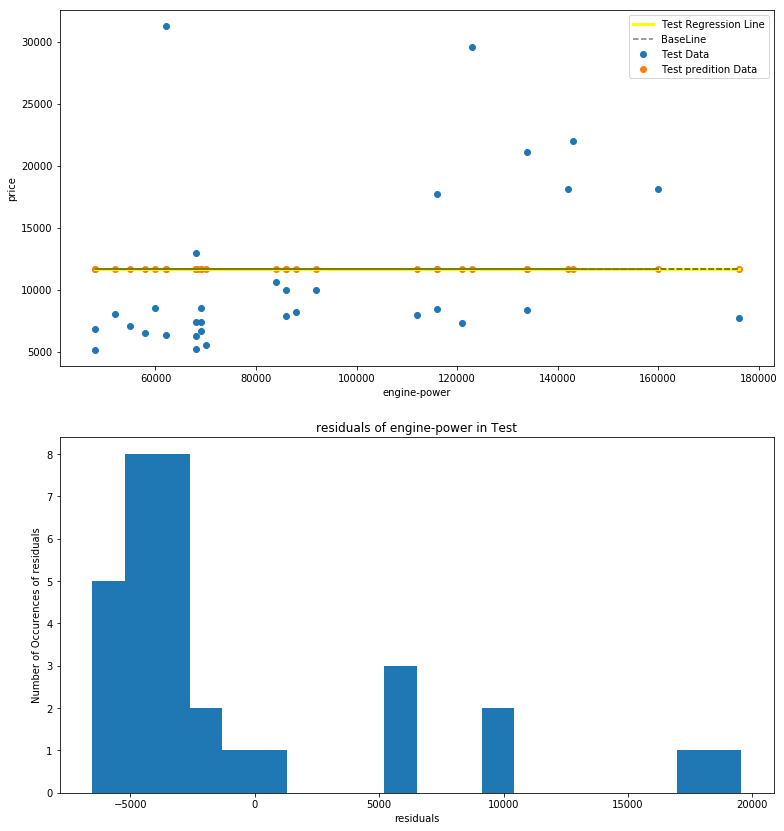

In [16]:
# (2) Show any working code here...
# Your Code goes here:

#get big size to make graph clear
plt.figure(figsize=(12.8,14.4))

#first graph
plt.subplot(2,1,1)
#test data scatter
plt.scatter(X_test, y_test, label="Test Data")
#build the baseLine
base_baseLineList = []
for i in range(len(X_test)):
    base_baseLineList.append(y_base.mean())
base_baseLine = np.reshape(base_baseLineList, (X_test.shape[0],1))

#draw the data points of Regression Line
plt.scatter(X_test,pred_y_base, label="Test predition Data")

#draw the Regression Line, because in this question, because Regression Line is close to baseline
#so I make them different color and let the Regression Line more width
plt.plot(X_test,pred_y_base,label="Test Regression Line",color='yellow',linewidth=3)

#draw the baseline
plt.plot(X_test,base_baseLine,label="BaseLine",color='black',linestyle='--',alpha=0.5)

#label axis
plt.xlabel("engine-power")
plt.ylabel("price")
plt.legend()

plt.subplot(2,1,2)

#draw histogram
plt.hist(y_test - pred_y_base,bins=20)
plt.xlabel('residuals')
plt.ylabel('Number of Occurences of residuals')
plt.title('residuals of engine-power in Test')

plt.show()



(2) - Final Conclusion(s)
***Your answer goes here:***

through the r2 and the first graph this LinearRegression model is very close to baseline mode. 
r2 and the first graph also mean that the LinearRegression model is difficult to fit these test data.
in the 'train_auto_base' dataset, "engine-power" and "price" have almost no linear relationship.



## 3. Multivariate Linear Regression
In this Section we will fit a Multivariate Linear Regression model (still using [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html)) to the dataset: i.e. we will now train a model with **multiple** explanatory variables and ascertain how they affect our ability to predict the retail price of a car. 

**N.B. We will use the *KFold* instance you created in [Question 2.8](#question_2_8) to train & validate our models.**

### ========== Question 3.1 --- [6 marks] ==========

1. [Code] Train a Multi-Variate `LinearRegression` model on the original `auto_numeric` dataframe you loaded in [Question 1.1](#question_1_1), and evaluate it using the *KFold* instance you created in [Question 2.8](#question_2_8) (report RMSE and $R^2$). 
1. [Text] Comment on the result, and compare with the univariate linear regression model we trained previously ([Question 2.5](#question_2_5)).

In [23]:
# (1) # Your Code goes here:

data_path = os.path.join(os.getcwd(),'datasets','train_auto_numeric.csv')
auto_numeric1 = pd.read_csv(data_path,delimiter=',')
y1 = auto_numeric1['price']

lm4 = LinearRegression(normalize=True)
X1 = auto_numeric1.drop(['price'], axis=1)
y_pred1 = cross_val_predict(lm4, X=X1, y=y1, cv=kf)

r2Score = r2_score(y1,y_pred1)
print('r2 score is',r2Score)

mse = mean_squared_error(y1,y_pred1)
rmse = sqrt(mse)
print('RMSE value is',rmse)



r2 score is 0.46928695547492405
RMSE value is 4898.194867312246


(2) ***Your answer goes here:***

By comparing the two sets of data, you can know:
It is difficult to determine an independent variable for a single variable. For example, "engine-power" is difficult to determine or affect the change of "price". Multiple non-independent variables make the model more complex, resulting in stronger linearity and lower errors, although multiple variables will make the amount of calculation larger.


### ========== Question 3.2 --- [4 marks] ==========

1. [Code] Examine the scatter plot of `engine-size` vs `price` (plot below)
1. [Text] Why might this cause a problem for linear regression? 

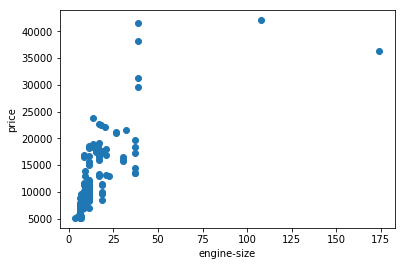

In [18]:
# (1) # Your Code goes here:
X = auto_numeric['engine-size']

plt.figure()

plt.subplot(1,1,1)

plt.scatter(X,y)

plt.xlabel('engine-size')

plt.ylabel('price')

plt.show()

(2) ***Your answer goes here:***

The data is concentrated in the range of 0-50. The tilt of this data will cause the linear regression model to be affected by larger or smaller outliers，resulting in inaccurate models.

<a id='question_3_3'></a>
### ========== Question 3.3 --- [10 marks] ==========
In class we discussed ways of preprocessing features to improve performance in such cases.
1. [Code] Transform the `engine-size` attribute using an appropriate technique from the lectures (document it in your code) and show the transformed data (scatter plot).
1. [Code] Then retrain a (Multi-variate) LinearRegression Model (on all the attributes including the transformed `engine-size`) and report $R^2$ and RMSE. 
1. [Text] How has the performance of the model changed when compared to the previous result? and why so significantly?

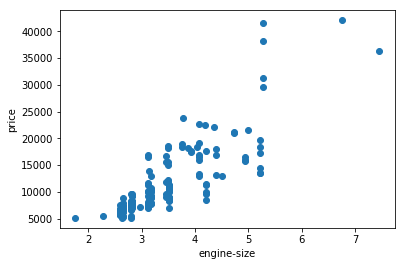

In [19]:
# (1) # Your Code goes here:

transAuto_auto_numeric = auto_numeric.copy()

for i in range(len(transAuto_auto_numeric['engine-size'])):
    value = transAuto_auto_numeric['engine-size'].iloc[i]
    value = log(value, 2)
    transAuto_auto_numeric['engine-size'].iloc[i] = value

plt.figure()
plt.subplot(1,1,1)
plt.scatter(transAuto_auto_numeric['engine-size'],transAuto_auto_numeric['price'])
plt.xlabel('engine-size')

plt.ylabel('price')

plt.show()

In [20]:
# (2) # Your Code goes here:

X2 = transAuto_auto_numeric.drop(['price'], axis=1)
y2 = transAuto_auto_numeric['price']
lm4 = LinearRegression(normalize=True)
lm4.fit(X=X2,y=y2)
y_pred4 = cross_val_predict(lm4, X2, y=y2, cv=kf)


r2Score = r2_score(y2,y_pred4)
print('r2 score is',r2Score)

mse = mean_squared_error(y2,y_pred4)
rmse = sqrt(mse)
print('RMSE value is',rmse)

r2 score is 0.6929114135725609
RMSE value is 3725.9585168035082


(3) ***Your answer goes here:***
after use logarithmic transformations of variables:
compare the r2 and the RMSE to previous result, it shows r2 is increased and RMSE is decreased.This means the model have stronger linearity and less error of prediction. the model have better fit and the performance of  become better

after transformations，the data will be more evenly distributed, more linear, and will also reduce the variance between the predicted values.

With question 1.2, we know that engine-size and price are highly correlated, so converting this property is better than other properties.


### ========== Question 3.4 --- (LEVEL 11) --- [12 marks] ==========

The simplicity of Linear Regression allows us to interpret the importance of certain features in predicting target variables. However this is not as straightforward as just reading off the coefficients of each of the attributes and ranking them in order of magnitude.

1. [Text] Why is this? How can we *linearly* preprocess the attributes to allow for a comparison? Justify your answer.
1. [Code] Perform the preprocessing you just mentioned on the transformed data-set from [Question 3.3](#question_3_3), retrain the Linear-Regressor and report the coefficients in a readable manner. *Tip: To simplify matters, you may abuse standard practice and train the model once on the entire data-set with no validation/test set.*
1. [Text] Which are the three (3) most important features for predicting price under this model?

(1) ***Your answer goes here:***

Because the range of values for each variable is different.
Some variables have a very large range of values, which may be 10,000-20000. Some variables have small values, which may be 0-10, so that weights cannot be used to distinguish the influence of variables on y("price").
Therefore, it is necessary to reduce the numerical range of the variable to the same range. Here I use Min-max normalization. 


In [50]:
# (2) # Your Code goes here:

nonline_data_path = os.path.join(os.getcwd(),'datasets','train_auto_nonlinear.csv')
train_auto_nonlinear = pd.read_csv(nonline_data_path,delimiter=',')

X6 = train_auto_nonlinear.drop('price',axis=1)
y6 = train_auto_nonlinear['price']
min_max_scaler = MinMaxScaler()
#use Min-max normalization
X_minMax = min_max_scaler.fit_transform(X6)

lm6 = LinearRegression(normalize=True)
lm6.fit(X=X_minMax,y=y6)

#print the weights
print(lm6.coef_)
print(X6.columns.values)

[-1445.77102267  2022.07082928  -191.95583882  6892.7520809
  1771.38290863 33073.93205384 -2053.23720593 -4234.90784239
  2826.42856225 -2425.45100758  3193.30450417  2674.94805655
 -6140.12408041 -1856.1248631   -792.85635714]
['normalized-losses' 'wheel-base' 'length' 'width' 'height' 'engine-size'
 'bore' 'stroke' 'compression-ratio' 'engine-power' 'peak-rpm' 'city-mpg'
 'highway-mpg' 'mean-effective-pressure' 'torque']


(3) ***Your answer goes here:***
The data I print is the weights of each attributes, so the most important features are 'engine-size','width' and 'highway-mpg'



### ========== Question 3.5 --- (LEVEL 11) --- [10 marks] ==========

In the lectures we discussed another form of extension to the basic linear-regression model: the introduction of basis functions. This method attempts to capture non-linearities in the input-output mapping.

1. [Text] How would you choose the features to test higher-orders on? And how would you choose the best polynomial order for these features?
1. [Code] Load the csv file `train_auto_nonlinear.csv` into a new dataframe (this is a standard version of the transformed data-set from [Question 3.3](#question_3_3)). Add a second-order basis to the two attributes `length` and `engine-power` and train a new LinearRegression model. Report the $R^2$ and RMSE performance.
1. [Text] Comment on the result in relation to those in [Question 3.3](#question_3_3).

(1) ***Your answer goes here:***

1)I would compute the correlation coefficient between each attribute and price, and I will choose attributes whose value is closer to 0.

2)I will draw a pairplot between the attribute and 'price' to observe the trend of the points in the graph to decide  the best polynomial order. But I think that I need constant experimentation to find the best



In [22]:
# (2) # Your Code goes here:

nonline_data_path = os.path.join(os.getcwd(),'datasets','train_auto_nonlinear.csv')
train_auto_nonlinear = pd.read_csv(nonline_data_path,delimiter=',')

X5 = train_auto_nonlinear.drop('price',axis=1)
y = train_auto_nonlinear['price']

poly = PolynomialFeatures(degree=2)


x_train_poly = poly.fit_transform(X5.loc[:,['length','engine-power']])

X_length_engine = X5.copy()
X_length_engine = X_length_engine.drop(['length','engine-power'],axis=1)

for i in range(x_train_poly.shape[1]):
    #the column name is not import,here just calculate the result
    X_length_engine.insert(0,'polynomialData{}'.format(i),x_train_poly[:,i:i+1])

lm5 = LinearRegression()
lm5.fit(X=X_length_engine,y=y)
y_pred5 = cross_val_predict(lm5, X_length_engine, y=y, cv=kf)



r2Score = r2_score(y,y_pred5)
print('r2 score of attributes length and engine-power is',r2Score)

mse = mean_squared_error(y,y_pred5)
rmse = sqrt(mse)
print('RMSE value of attributes length and engine-power is',rmse)


print("##################################################")

x_train_poly1 = poly.fit_transform(X5.loc[:,['normalized-losses','wheel-base']])

X_wheel_base = X5.copy()
X_wheel_base = X_wheel_base.drop(['normalized-losses','wheel-base'],axis=1)

for i in range(x_train_poly1.shape[1]):
    #the column name is not import,here just calculate the result
    X_wheel_base.insert(0,'polynomialData{}'.format(i),x_train_poly1[:,i:i+1])

lm5 = LinearRegression()
lm5.fit(X=X_wheel_base,y=y)
y_pred5 = cross_val_predict(lm5, X_wheel_base, y=y, cv=kf)



r2Score = r2_score(y,y_pred5)
print('r2 score of attributes normalized-losses and wheel-base is',r2Score)

mse = mean_squared_error(y,y_pred5)
rmse = sqrt(mse)
print('RMSE value of attributes normalized-losses and wheel-base is',rmse)


r2 score of attributes length and engine-power is 0.6814808167089075
RMSE value of attributes length and engine-power is 3794.6696555879575
##################################################
r2 score of attributes normalized-losses and wheel-base is 0.7062910794123081
RMSE value of attributes normalized-losses and wheel-base is 3643.8857046894445


(3) ***Your answer goes here:***

In contrast to the data in question 1, the r2 obtained by this model is slightly lower and the RMSE is slightly higher. This shows that the higher-order operation of the "length" and "engine-power" attributes does not improve the performance of this model.

so, I try another two attributes "normalized-losses" and "wheel-base" with same method. I find that the R2 value is inreased to over 0.706 and the RMSE value is decreased to 3643. the higher-order operation of the "normalized-losses" and "wheel-base" can make this model more accurate.
